<a href="https://colab.research.google.com/github/DomTHK/DLO_Lab/blob/main/DLO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Einbinden des eigenen Google-Drive
## - CLM auf den erscheinenden Link
# - Google-Koto auswaehlen
# - Die Verwendung zulassen (ggf. ganz nach unten scrollen)
# - Den angezeigten authorization code in die Zwischenablage kopieren
# - Zurueck zu dieser Seite und den authorization cade in die umrandete Box aus der Zwischenablage einfuegen
# - Die Eingabe mit RETURN abschliessen
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASEDIR='/content/drive/My Drive/Colab_Drive/ML_TH/'

# Weitere vorausgesetzte Verzeichnisse anlegen
import os
if os.path.exists(BASEDIR + 'Data_Input'):
  print("Das Verzeichnis  "+BASEDIR+'Data_Input'+"   existiert bereits")
else:
  os.mkdir(BASEDIR + 'Data_Input')

if os.path.exists(BASEDIR + 'Temp'):
  print("Das Verzeichnis  "+BASEDIR+'Temp'+"   existiert bereits")
else:
  os.mkdir(BASEDIR + 'Temp')

# Die ML-Lib importieren. Diese muss im zuvor definierten BASEDIR stehen
import os
os.chdir(BASEDIR)
import ML_Lib as ml

Das Verzeichnis  /content/drive/My Drive/Colab_Drive/ML_TH/Data_Input   existiert bereits
Das Verzeichnis  /content/drive/My Drive/Colab_Drive/ML_TH/Temp   existiert bereits


d: 0.0
w [ 0.79375706 -0.60823492]
Winkel von w: -37.46198566080159
Steigungvon line: 1.3050172420219976


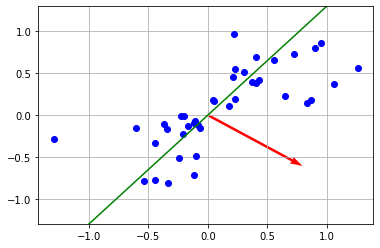

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

anz_punkte = 40
epochs = 100
n = 0.001

x = np.random.randn(anz_punkte, 2)/2
for i in np.arange(anz_punkte): # Punkte werden in Quadrant 1&3 gelegt
    #x[i] = np.random.randn(1,2)
    if x[i,0]>0 and x[i,1]<0 or x[i,0]<0 and x[i,1]>0: x[i,0]=-x[i,0]
#x = np.squeeze(np.asarray(x))
 
unit_square_digonal_neg = -np.sqrt(2)/2
w = (-np.sqrt(2)/2, -np.sqrt(2)/2)
#w = np.full((anz_punkte, 2),unit_square_digonal_neg)
#print("Das ist w[10,10]:", w)
#w = np.squeeze(np.asarray(w))

b = 0
u = 0.142
d = 0.42
y = np.full((anz_punkte,1),1.0) #anz_punkte Labels zu x zuordnen: Quadrant 3: -1; Q1: 1
#y = np.squeeze(np.asarray(y))

for j in np.arange(anz_punkte):
  y[j] = -1 if (x[j,1] <= 0) else 1

for i in np.arange(epochs):
    for k in np.arange(anz_punkte):
        u = (w*x[k]).sum() + b
        y_ = -1 if (u <= 0) else 1
        d = y[k]-y_
        w = w + n*d*x[k]
        w = w*(1/(np.linalg.norm(w)))

print('d:', d.sum()/anz_punkte)
print('w', w)
print('Winkel von w:', math.degrees(np.arcsin(w[1])))
plt.plot(x[:,0], x[:,1],'bo')

line_m = np.tan(np.arcsin(w[1]) + np.pi/2)
print('Steigungvon line:', line_m)
line_x = np.linspace(-1.0,1.0,5)
line_y = line_m*line_x
plt.plot(line_x, line_y, '-g', label='point-separating-line')
plt.ylim(-1.3,1.3)

o = np.array([0, 0])
plt.quiver(0, 0, w[0], w[1], color=['red'], angles='xy', scale_units='xy', scale=1)
plt.grid()
plt.show()